In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Анализ датасета машин

In [4]:
fdata = pd.read_csv('../Desktop/fuel.csv')
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


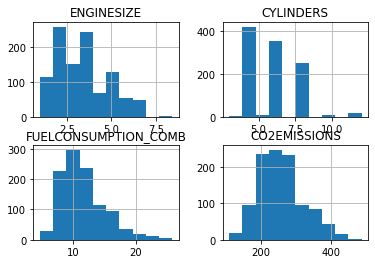

In [5]:
subData = fdata[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]
subData.hist()
plt.show()

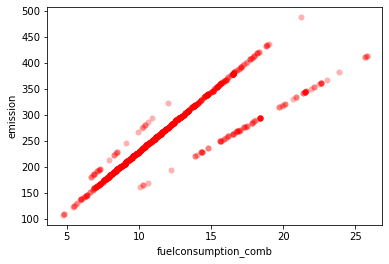

In [6]:
plt.scatter(subData.FUELCONSUMPTION_COMB, subData.CO2EMISSIONS, color='red', linewidth=0.02, alpha=0.3)
plt.xlabel("fuelconsumption_comb")
plt.ylabel("emission")
plt.show()

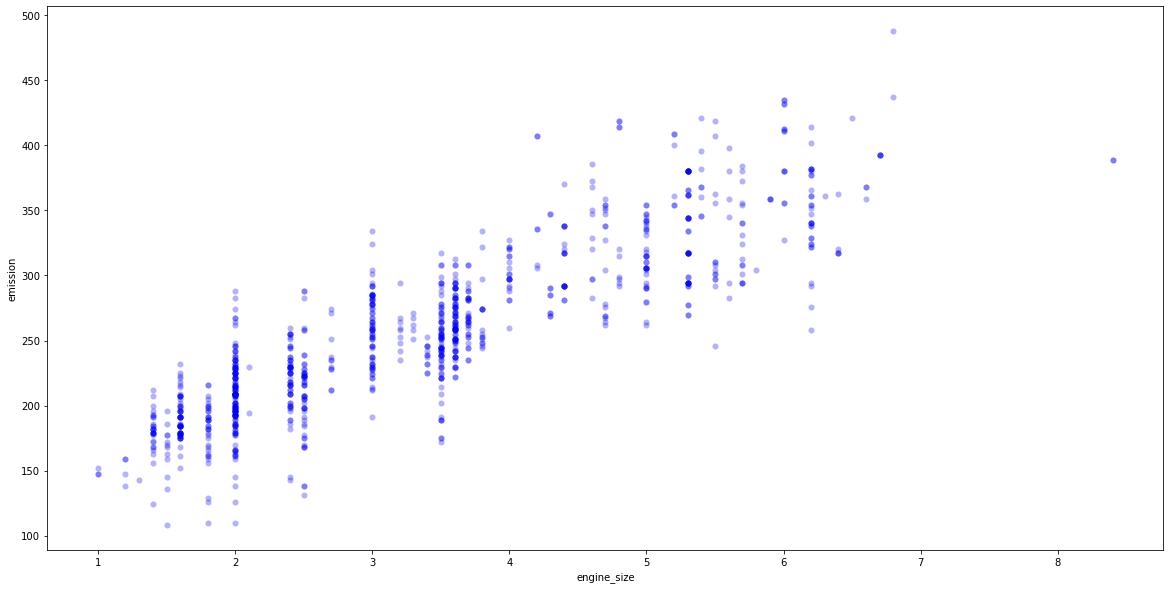

In [7]:
plt.figure(figsize=(20, 10))
plt.scatter(fdata.ENGINESIZE, fdata.CO2EMISSIONS, color='blue', linewidth=0.02, alpha=0.3)
plt.xlabel("engine_size")
plt.ylabel("emission")
plt.show()

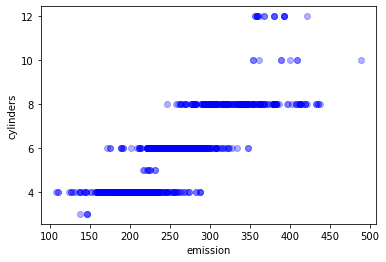

In [8]:
plt.scatter(fdata.CO2EMISSIONS, fdata.CYLINDERS, color='blue', alpha=0.3)
plt.xlabel("emission")
plt.ylabel("cylinders")
plt.show()

In [9]:
qwe = np.random.rand(len(fdata)) < 0.8
train = subData[qwe]
test = subData[~qwe]

In [10]:
from sklearn import linear_model
model = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
model.fit(train_x, train_y)

print('coef', model.coef_)
print('intercept', model.intercept_)

coef [[38.96878813]]
intercept [125.33779105]


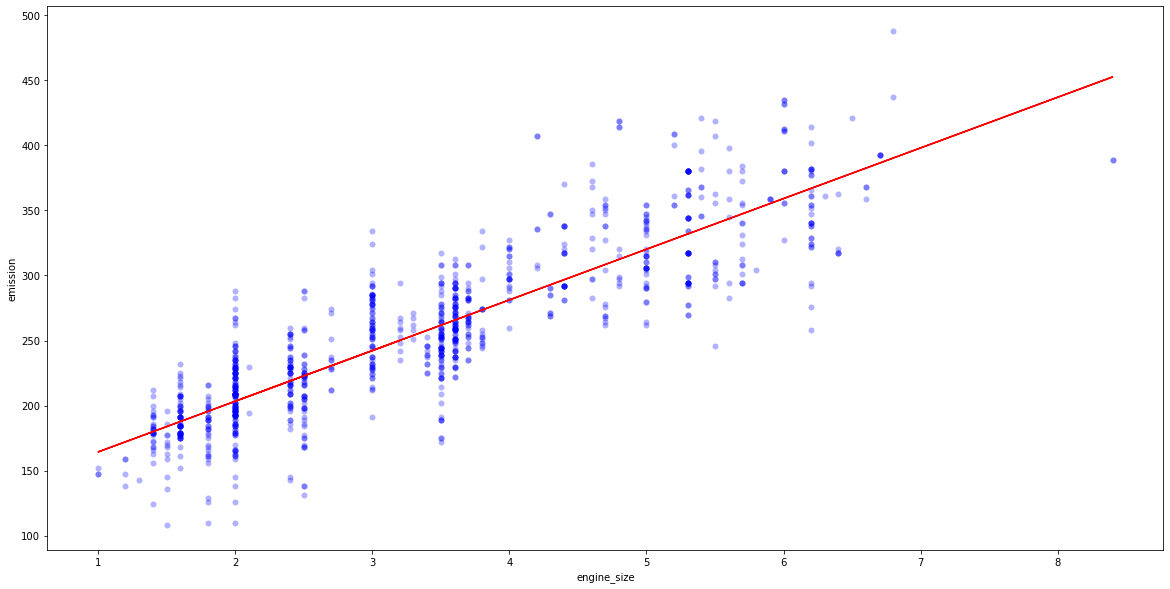

In [11]:
plt.figure(figsize=(20, 10))
plt.scatter(fdata.ENGINESIZE, fdata.CO2EMISSIONS, color='blue', linewidth=0.01, alpha=0.3)
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r') #x, y = kx + b
plt.xlabel("engine_size")
plt.ylabel("emission")
plt.show()

In [12]:
#??
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = model.predict(test_x)

print('mean', np.mean(np.absolute(test_y_ - test_y)))
print('mse', np.mean((test_y_ - test_y) ** 2)) #??
print('r2_score', r2_score(test_y_, test_y))


mean 25.99943228626698
mse 1171.0112537666034
r2_score 0.6225603587765961


In [13]:
print('emissions', model.predict([[7]]))

emissions [[398.11930792]]
